In [18]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 


In [19]:
kahvaltilik = cv2.imread("DATA\\kahvaltilik.png" ,0)
raf = cv2.imread("DATA\\raf.jpg",0)

In [20]:
kahvaltilik

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
orb = cv2.ORB_create()

In [22]:
kp1 ,dest1 = orb.detectAndCompute(kahvaltilik ,None)
kp2 ,dest2 = orb.detectAndCompute(raf ,None)


In [23]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING ,crossCheck=True)

In [24]:
matches = bf.match(dest1,dest2)

In [25]:
matches = sorted(matches , key = lambda x : x.distance) # eşlenmişleri uzaklıklarına göre sırala

In [26]:
cizdirme = cv2.drawMatches(kahvaltilik ,kp1,raf,kp2,matches[:25],None,flags = 2)

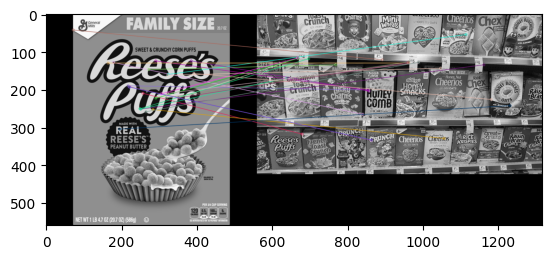

In [27]:
plt.imshow(cizdirme)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()

In [29]:
kp1 , dest1 = sift.detectAndCompute(kahvaltilik ,None)
kp2 , dest2 = sift.detectAndCompute(raf ,None)

In [30]:
bf = cv2.BFMatcher_create()

In [31]:
matches = bf.knnMatch(dest1 , dest2 ,k=2)

In [32]:
matches

((< cv2.DMatch 00000282DA296870>, < cv2.DMatch 00000282DA296B90>),
 (< cv2.DMatch 00000282DA296250>, < cv2.DMatch 00000282DA2962B0>),
 (< cv2.DMatch 00000282DA296750>, < cv2.DMatch 00000282DA296BF0>),
 (< cv2.DMatch 00000282DA296370>, < cv2.DMatch 00000282DA296DB0>),
 (< cv2.DMatch 00000282DA295450>, < cv2.DMatch 00000282DA296AB0>),
 (< cv2.DMatch 00000282DA2965F0>, < cv2.DMatch 00000282DA296290>),
 (< cv2.DMatch 00000282DA296330>, < cv2.DMatch 00000282DA2961F0>),
 (< cv2.DMatch 00000282DA296470>, < cv2.DMatch 00000282DA296A30>),
 (< cv2.DMatch 00000282DA295BD0>, < cv2.DMatch 00000282DA296650>),
 (< cv2.DMatch 00000282DA296A10>, < cv2.DMatch 00000282DA2962F0>),
 (< cv2.DMatch 00000282DA296C10>, < cv2.DMatch 00000282DA296CF0>),
 (< cv2.DMatch 00000282DA295910>, < cv2.DMatch 00000282DA2969D0>),
 (< cv2.DMatch 00000282DA296A70>, < cv2.DMatch 00000282DA295610>),
 (< cv2.DMatch 00000282DA295F90>, < cv2.DMatch 00000282DA294CF0>),
 (< cv2.DMatch 00000282DA295A10>, < cv2.DMatch 00000282DA29649

In [33]:
good  = []
for match1 ,match2 in matches:
    if match1.distance <0.75 *match2.distance:
        good.append([match1])
        

In [34]:
cizdirme2 = cv2.drawMatchesKnn(kahvaltilik ,kp1 ,raf,kp2,good,None, flags = 2)

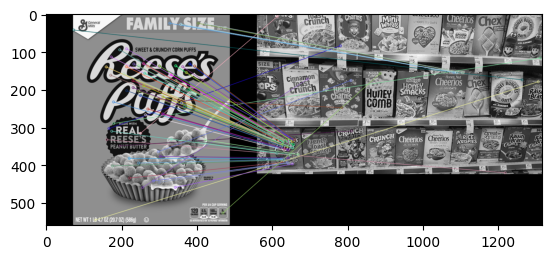

In [35]:
plt.imshow(cizdirme2)